In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
import lmdiag

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# Problem 0


### a) Create a random vector X containing 100 observations drawn from a N(0, 1) distribution

In [238]:
X = np.random.normal(0, 1, 100)

### b) Create a vector e containing 100 observations drawn from a N(0, 0.25) distribution

In [239]:
e = np.random.normal(0, 0.25, 100)

### c) Generate a vector Y according to the model    Y = −1 + 0.5X + e

In [240]:
Y = -1 + 0.5*X + e

### d) Create a scatterplot displaying the relationship between X and Y. Comment on what you observe

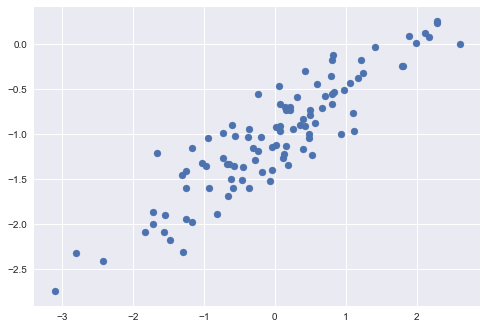

In [241]:
plt.scatter(x=X, y=Y) # plotting the scatterplot of generated data
plt.show()

The graph shows a linear relationship

### e) Fit a least squares linear model to predict Y using X.  
Comment on the model obtained (p-values, accuracy measures, ...).  
How do β̂ 0 and β̂ 1 compare to β0 and β1

In [242]:
X_with_const = sm.add_constant(X) # adding constants vector of ones

In [243]:
X_with_const[:5,:] # look at the first 5 entries in X_with_const

array([[ 1.        , -1.2540471 ],
       [ 1.        ,  0.40012534],
       [ 1.        ,  0.66478769],
       [ 1.        ,  0.59232061],
       [ 1.        ,  2.29394881]])

In [244]:
model1 = sm.OLS(Y, X_with_const).fit() # fit OLS model 

In [245]:
print(model1.summary()) # printing the summary statistics of fitted model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     438.5
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           5.86e-38
Time:                        23:30:02   Log-Likelihood:                -10.922
No. Observations:                 100   AIC:                             25.84
Df Residuals:                      98   BIC:                             31.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0279      0.027    -37.704      0.0

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [271]:
# model1.fittedvalues # you can access the fitted values using the property `.fittedvalues`

β^o and β^1 are practically equal to βo and β1. As expected, β^o and β^1 are statistically signficant and Adj. R-square = 0.824 shows that the model fits the data quite well.

We obtain the same result by using sklearn LinearRegression

In [247]:
model2 = LinearRegression()
model2.fit(X=X_with_const, y=Y)
print("Coefficient %s:" % model2.coef_[1])
print("Intercept: %s" % model2.intercept_)


Coefficient 0.5148017802843886:
Intercept: -1.027948505546304


### f) Display the least squares line on the scatterplot obtained in d). Draw the population regression line on the plot, in a different color. Create appropriate legends

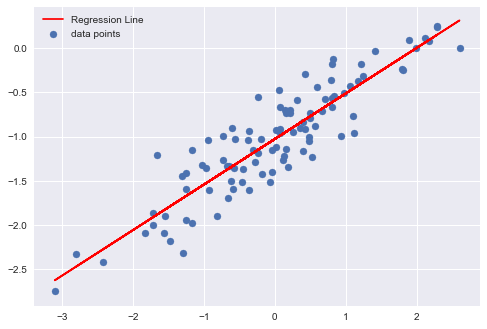

In [248]:
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model1.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show()

### g) Fit a polynomial regression model that predicts Y using X and X^2. Is there evidence that the quadratic term improves the model fit? Explain your answer

In [249]:
X2 = (X_with_const[:, 1] ** 2).reshape(100, 1) # calculating the X^2 values for X and bringing it (100,1) shape using np.reshape
X_poly = np.append(X_with_const, X2, axis=1)

In [250]:
print(X_poly[:5,:])

[[ 1.         -1.2540471   1.57263412]
 [ 1.          0.40012534  0.16010029]
 [ 1.          0.66478769  0.44194267]
 [ 1.          0.59232061  0.3508437 ]
 [ 1.          2.29394881  5.26220113]]


In [251]:
X_poly[:5,:]

array([[ 1.        , -1.2540471 ,  1.57263412],
       [ 1.        ,  0.40012534,  0.16010029],
       [ 1.        ,  0.66478769,  0.44194267],
       [ 1.        ,  0.59232061,  0.3508437 ],
       [ 1.        ,  2.29394881,  5.26220113]])

In [270]:
model3 = sm.OLS(Y, X_poly).fit() # fitting the OLS using X and X^2 as features
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     63.12
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           2.77e-18
Time:                        23:51:07   Log-Likelihood:                -75.580
No. Observations:                 100   AIC:                             157.2
Df Residuals:                      97   BIC:                             165.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9430      0.063    -14.879      0.0

As we can see from above summary, p-value for second feature is equal to 0.284 which means that X^2 feature is not important.

### h) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results

At first let's modify the data generation process in such a way that there is less noise in the data.

In [253]:
e = np.random.normal(0, 0.1, 100) # generate less noisy data by sampling data from normal distribution of which the standart deviation of equal to 0.1
Y = -1 + 0.5*X + e
model_less_noise = sm.OLS(Y, X_with_const).fit()

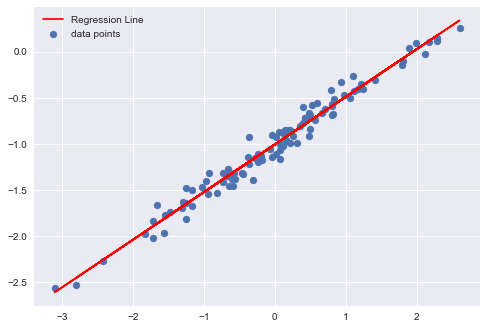

In [254]:
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model_less_noise.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show()

In [255]:
print(model_less_noise.summary())#.tables[0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3520.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.31e-78
Time:                        23:30:14   Log-Likelihood:                 92.795
No. Observations:                 100   AIC:                            -181.6
Df Residuals:                      98   BIC:                            -176.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0086      0.010   -104.364      0.0

In case of less noise data, we obtain more accurate predicted coefficients for β0 and β1, and Adj. R.squared = 0.965

### Now the case of noisier data set.

In [256]:
e = np.random.normal(0, 0.5, 100)
Y = -1 + 0.5*X + e

In [257]:
model_noisier = sm.OLS(Y, X_with_const).fit()
print(model_noisier.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           3.03e-19
Time:                        23:30:16   Log-Likelihood:                -76.033
No. Observations:                 100   AIC:                             156.1
Df Residuals:                      98   BIC:                             161.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9766      0.052    -18.680      0.0

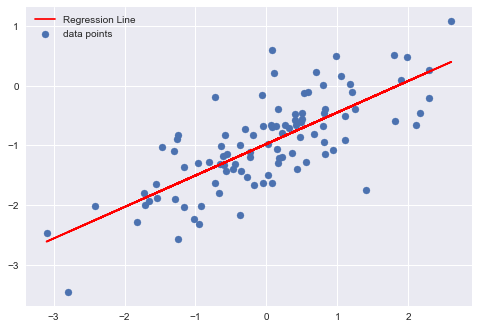

In [258]:
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model_noisier.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show();

In noisier data set, Adj. R-squared = 0.674, nevertheless predicted coefficients are close to actual coefficients

Now let's see what are the confidence intervals for βo and β1 based on the original data set, the noisier data set, and the less noisy data set?

In [259]:
print('Confidence Intervals for original data set')
print(model1.conf_int())
print('\n')
print('Confidence Intervals for less noise data set')
print(model_less_noise.conf_int())
print('\n')
print('Confidence Intervals for noisier data set')
print(model_noisier.conf_int())

Confidence Intervals for original data set
[[-1.08205226 -0.97384475]
 [ 0.46601748  0.56358608]]


Confidence Intervals for less noise data set
[[-1.02773114 -0.98937612]
 [ 0.49965727  0.53424124]]


Confidence Intervals for noisier data set
[[-1.08038958 -0.87288266]
 [ 0.43459544  0.62170038]]


From the above results we can say that the lenght of the confidence intervals is small for less noise data set and big for noisier data set